In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()
        
        #encoder layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc21 = nn.Linear(hidden_size, latent_size)
        self.fc22 = nn.Linear(hidden_size, latent_size)
        #decoder layers
        self.fc3 = nn.Linear(latent_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, input_size)

    #input_size 784 --> latent size 20
    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    #this is needed to that the calculation is differentiable
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    #latent size 20 --> input size 784
    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Define loss function
def loss_function(recon_x, x, mu, logvar):
    #loss between original x and reconstructed x
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    #regularization purposes
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training function
def train(model, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set hyperparameters
batch_size = 128
epochs = 10
lr = 1e-3
input_size = 784
hidden_size = 400
latent_size = 20
log_interval = 100

# Load data
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)

# Initialize model and optimizer
model = VAE(input_size, hidden_size, latent_size).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)


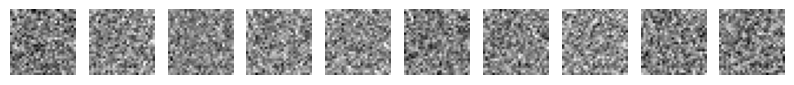

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate new images from random samples in the latent space
def generate_samples(model, num_samples):
    with torch.no_grad():
        z = torch.randn(num_samples, latent_size).to(device)
        generated_images = model.decode(z).cpu()
    return generated_images.view(-1, 28, 28)


def plot_ten_samples():
   # Generate 10 new images
    num_samples = 10
    generated_images = generate_samples(model, num_samples)

    # Plot the generated images
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(generated_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

plot_ten_samples()

Train Epoch: 1 [0/60000 (0%)]	Loss: 265.936249
Train Epoch: 1 [12800/60000 (21%)]	Loss: 263.566132
Train Epoch: 1 [25600/60000 (43%)]	Loss: 253.484116
Train Epoch: 1 [38400/60000 (64%)]	Loss: 252.157364
Train Epoch: 1 [51200/60000 (85%)]	Loss: 261.072235


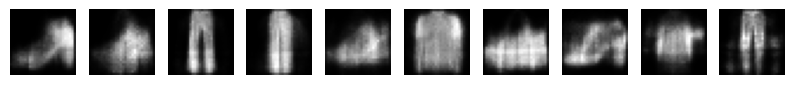

Train Epoch: 2 [0/60000 (0%)]	Loss: 252.192642
Train Epoch: 2 [12800/60000 (21%)]	Loss: 254.260971
Train Epoch: 2 [25600/60000 (43%)]	Loss: 252.443893
Train Epoch: 2 [38400/60000 (64%)]	Loss: 248.330750
Train Epoch: 2 [51200/60000 (85%)]	Loss: 247.870102


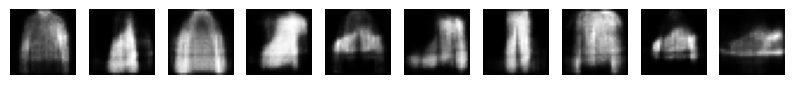

Train Epoch: 3 [0/60000 (0%)]	Loss: 252.545135
Train Epoch: 3 [12800/60000 (21%)]	Loss: 248.885193
Train Epoch: 3 [25600/60000 (43%)]	Loss: 254.203613
Train Epoch: 3 [38400/60000 (64%)]	Loss: 250.752716
Train Epoch: 3 [51200/60000 (85%)]	Loss: 241.107849


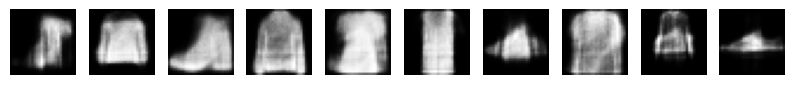

Train Epoch: 4 [0/60000 (0%)]	Loss: 259.151154
Train Epoch: 4 [12800/60000 (21%)]	Loss: 242.375854
Train Epoch: 4 [25600/60000 (43%)]	Loss: 245.830902
Train Epoch: 4 [38400/60000 (64%)]	Loss: 233.117386
Train Epoch: 4 [51200/60000 (85%)]	Loss: 249.423447


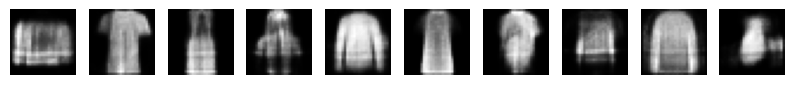

Train Epoch: 5 [0/60000 (0%)]	Loss: 247.796509
Train Epoch: 5 [12800/60000 (21%)]	Loss: 233.909546
Train Epoch: 5 [25600/60000 (43%)]	Loss: 252.701645
Train Epoch: 5 [38400/60000 (64%)]	Loss: 249.959534
Train Epoch: 5 [51200/60000 (85%)]	Loss: 252.529205


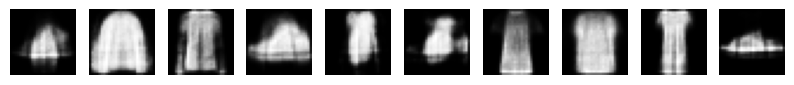

Train Epoch: 6 [0/60000 (0%)]	Loss: 246.062729
Train Epoch: 6 [12800/60000 (21%)]	Loss: 237.017899
Train Epoch: 6 [25600/60000 (43%)]	Loss: 254.125748
Train Epoch: 6 [38400/60000 (64%)]	Loss: 245.269241
Train Epoch: 6 [51200/60000 (85%)]	Loss: 243.122391


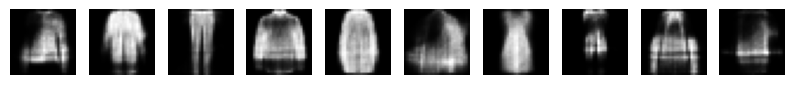

Train Epoch: 7 [0/60000 (0%)]	Loss: 250.924728
Train Epoch: 7 [12800/60000 (21%)]	Loss: 248.904572
Train Epoch: 7 [25600/60000 (43%)]	Loss: 253.733261
Train Epoch: 7 [38400/60000 (64%)]	Loss: 244.694046
Train Epoch: 7 [51200/60000 (85%)]	Loss: 233.288284


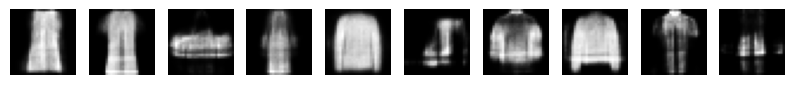

Train Epoch: 8 [0/60000 (0%)]	Loss: 243.557571
Train Epoch: 8 [12800/60000 (21%)]	Loss: 256.741699
Train Epoch: 8 [25600/60000 (43%)]	Loss: 249.821548
Train Epoch: 8 [38400/60000 (64%)]	Loss: 248.578674
Train Epoch: 8 [51200/60000 (85%)]	Loss: 247.446609


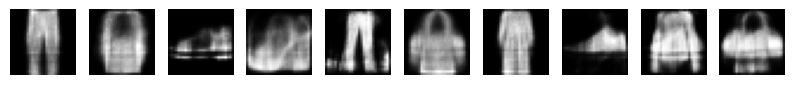

Train Epoch: 9 [0/60000 (0%)]	Loss: 239.642792
Train Epoch: 9 [12800/60000 (21%)]	Loss: 228.552658
Train Epoch: 9 [25600/60000 (43%)]	Loss: 240.248169
Train Epoch: 9 [38400/60000 (64%)]	Loss: 248.153366
Train Epoch: 9 [51200/60000 (85%)]	Loss: 240.290512


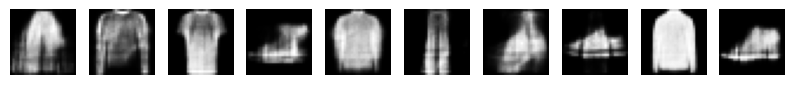

Train Epoch: 10 [0/60000 (0%)]	Loss: 244.115494
Train Epoch: 10 [12800/60000 (21%)]	Loss: 233.833588
Train Epoch: 10 [25600/60000 (43%)]	Loss: 238.978775
Train Epoch: 10 [38400/60000 (64%)]	Loss: 250.703461
Train Epoch: 10 [51200/60000 (85%)]	Loss: 242.289047


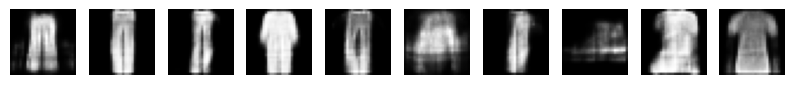

In [12]:
# Train the model
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    plot_ten_samples()